In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from preprocess import get_results

GENERATE_PNGS = False
pd.options.display.float_format = '{:.1f}'.format

### LibTorch: native and imported models

In [3]:
root = '../results_final_9'
training, evaluation = get_results(root)

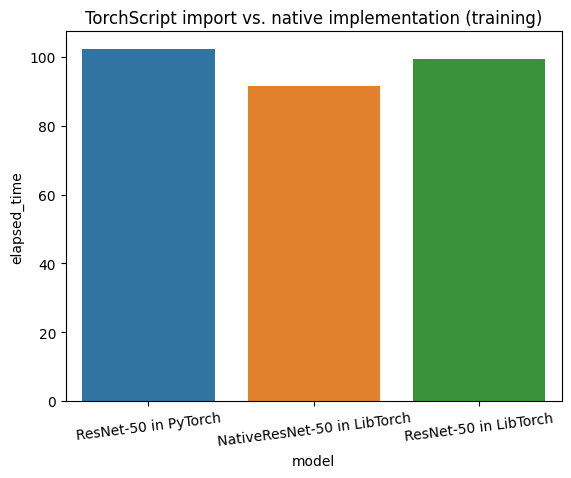

In [4]:
fig, ax = plt.subplots(1,1)

resnet = training[((training.model_name == 'ResNet-50') | (training.model_name == 'NativeResNet-50')) & (training.framework != 'Matlab')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet = resnet[resnet.epoch == 5].drop(columns=['epoch'])
resnet['model'] = resnet.pop('model_name') + ' in ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=7)
ax.set_title('TorchScript import vs. native implementation (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported_train.png')

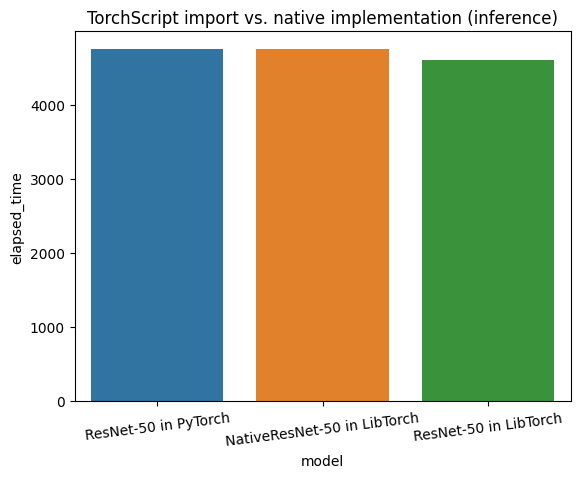

In [5]:
fig, ax = plt.subplots(1,1)

resnet = evaluation[((evaluation.model_name == 'ResNet-50') | (evaluation.model_name == 'NativeResNet-50')) & (evaluation.framework != 'Matlab')]
resnet = resnet[resnet.framework != 'TensorFlow']
resnet['model'] = resnet.pop('model_name') + ' in ' + resnet.pop('framework')

sns.barplot(data=resnet, x='model', y='elapsed_time', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=7)
ax.set_title('TorchScript import vs. native implementation (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_native_vs_imported_infer.png')

### Classification: LibTorch vs PyTorch
* dlaczego libtorch nie jest duzo szybszy od pytorcha? dla szkolenia jeszcze rozumiem, ale dla inferencji? przeciez libtorcha wykorzystuje sie wlasnie gdzie potrzeba jest low latency  
* dlaczego scvnet w pytorchu jest taki wolny? juz nawet nie w porownaniu z tf tylko nawet z libtorchem, a to przeciez ta sama architektura na tym samym silniku obliczeniowy
  * bo na każdej warstwie było implicit cast, juz poprawine i smiga 

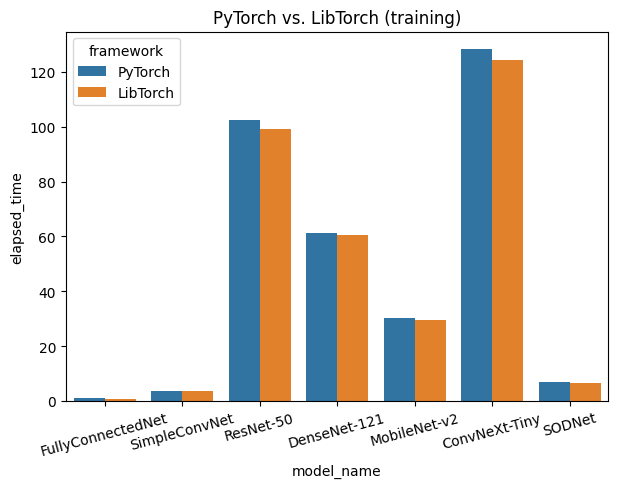

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = training[(training.framework == 'PyTorch') | (training.framework == 'LibTorch')] 
clfs = clfs[clfs.model_name != 'NativeResNet-50']
clfs = clfs[clfs.model_name != 'DCGAN']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=15)
ax.set_title('PyTorch vs. LibTorch (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch_clfs_train.png')

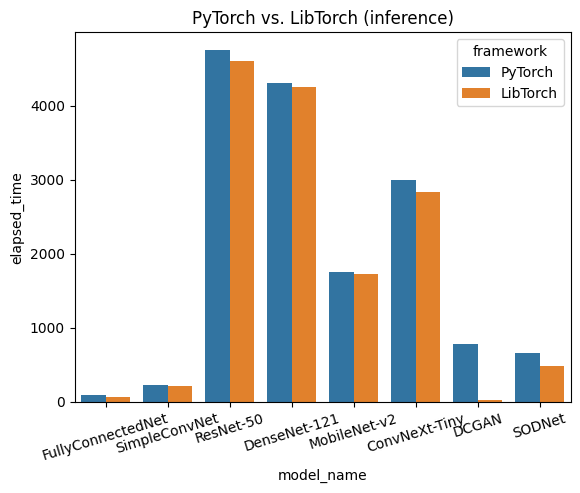

In [7]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework == 'PyTorch') | (evaluation.framework == 'LibTorch')]
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
# clfs = clfs[clfs.model_name != 'SODNet']
clfs = clfs[clfs.model_name != 'CELEBA']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. LibTorch (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/libtorch_vs_pytorch_clfs_infer.png')

### Classification: Torch vs. TensorFlow

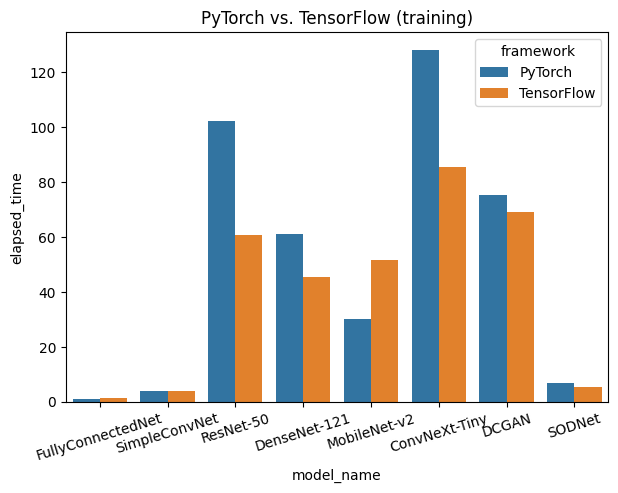

In [8]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = training[training.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
# clfs = clfs[clfs.model_name != 'DCGAN']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. TensorFlow (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/torch_vs_tensorflow_clfs_train.png')

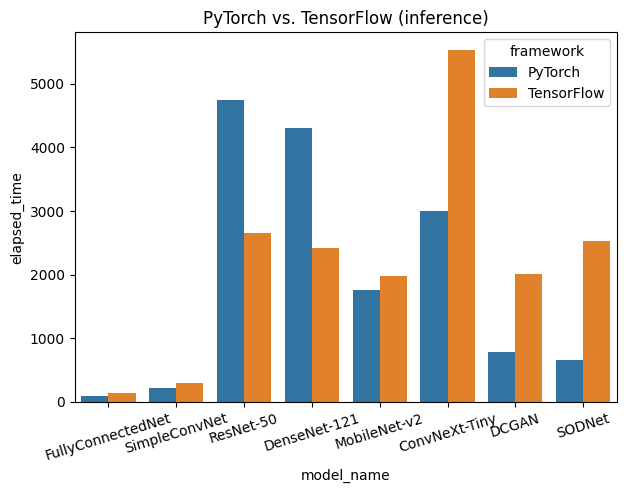

In [9]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(7, 4.8)

clfs = evaluation[evaluation.framework != 'Matlab']
clfs = clfs[clfs.framework != 'cuDNN']
clfs = clfs[clfs.framework != 'LibTorch']
clfs = clfs[clfs.model_name != 'NativeResNet-50']
# clfs = clfs[clfs.model_name != 'DCGAN']
clfs = clfs[clfs.model_name != 'CELEBA']
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=17)
ax.set_title('PyTorch vs. TensorFlow (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/torch_vs_tensorflow_clfs_infer.png')

### LibTorch vs cuDNN: Is it worth the hassle?

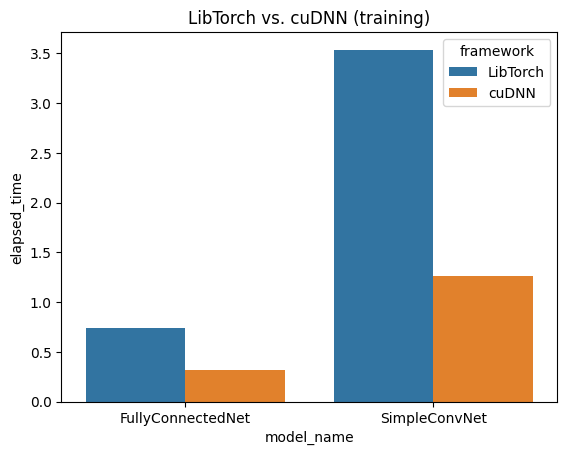

In [10]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework == 'cuDNN') | (training.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
clfs = clfs[clfs.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)

ax.set_title('LibTorch vs. cuDNN (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_train.png')

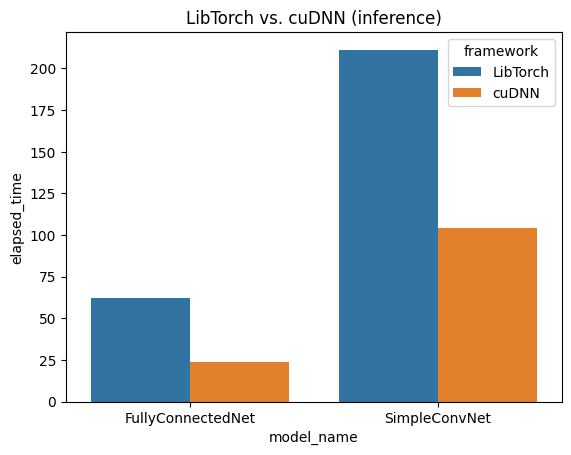

In [11]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework == 'cuDNN') | (evaluation.framework == 'LibTorch')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'SimpleConvNet')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('LibTorch vs. cuDNN (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/cudnn_infer.png')

### Matlab

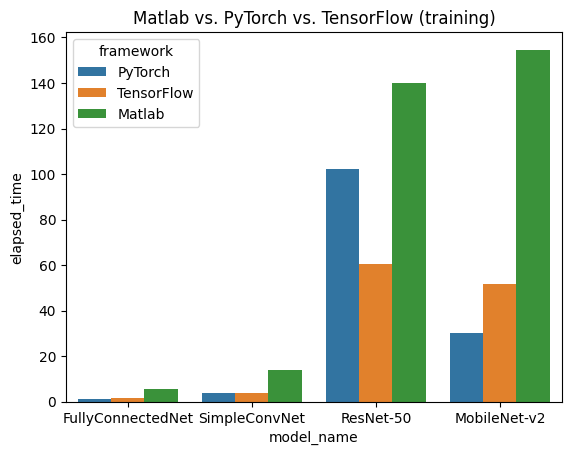

In [12]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework != 'LibTorch') & (training.framework != 'cuDNN')]
clfs = clfs[clfs.epoch == 2].drop(columns=['epoch'])
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet') | (clfs.model_name == 'ResNet-50')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('Matlab vs. PyTorch vs. TensorFlow (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_train.png')

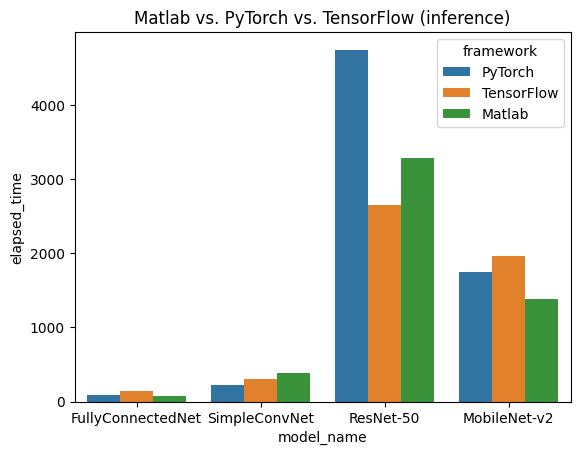

In [20]:
fig, ax = plt.subplots(1,1)

clfs = evaluation[(evaluation.framework != 'LibTorch') & (evaluation.framework != 'cuDNN')]
clfs = clfs[(clfs.model_name == 'FullyConnectedNet') | (clfs.model_name == 'MobileNet-v2') | (clfs.model_name == 'SimpleConvNet') | (clfs.model_name == 'ResNet-50')]
sns.barplot(data=clfs, x='model_name', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('Matlab vs. PyTorch vs. TensorFlow (inference)')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_infer.png')

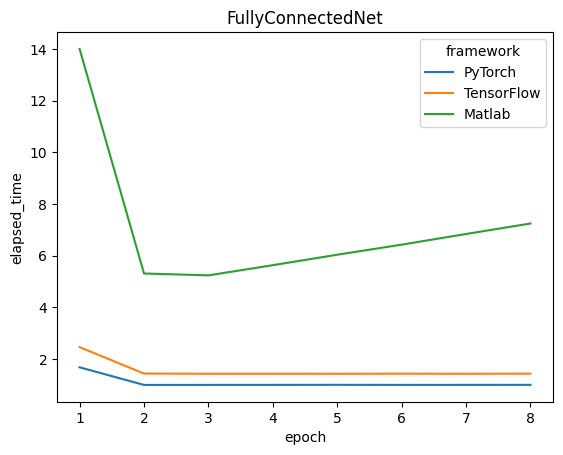

In [14]:
fig, ax = plt.subplots(1,1)

clfs = training[(training.framework != 'LibTorch') & (training.framework != 'cuDNN')]
sns.lineplot(data=clfs[clfs.model_name == 'FullyConnectedNet'], x='epoch', y='elapsed_time', hue='framework', ax=ax)
ax.set_title('FullyConnectedNet')

if GENERATE_PNGS:
	fig.savefig('./plots/matlab_increasing_train_time.png')

### DCGAN - generative adversial network

1. nie rozumiem dlaczego DCGAN w ogóle wykonuje się tak szybko w LibTorchu. Implementacja modeli i pętli uczącej jest identyczna w porówaniu do PyTorcha (wzorowana na [tym poradniu](https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html)), sprawdziłem też czy nie robię jakichś niepotrzebnych operacji (jak było z mapowaniem `np.float32` na `torch.float64` na kazdej warstwie SCVNetu)
2. jak widać nie chodziło o wczytywanie danych w trakcie nauki, bo czasy uczenia dla pythonowych frameworków zmieniły się bardzo nieznacznie

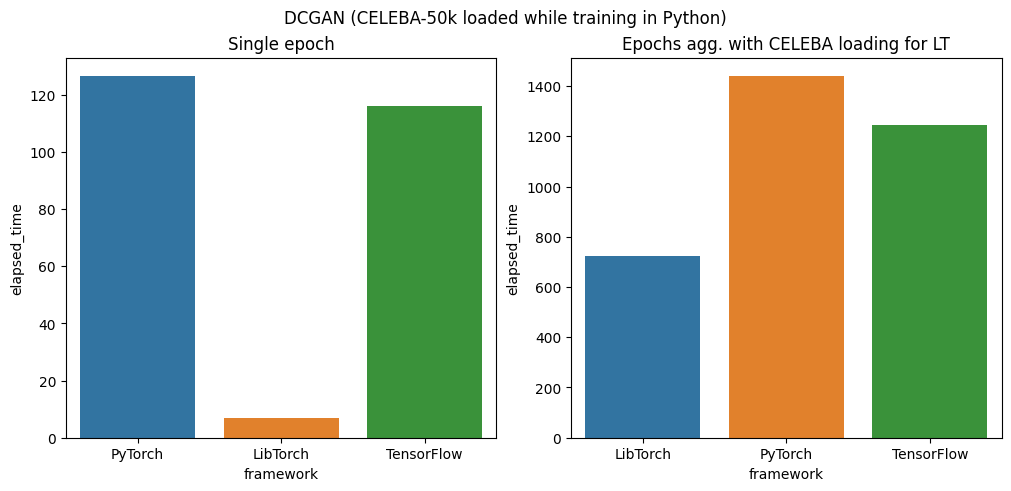

In [15]:
training_old, evaluation_old = get_results('../results_5', full=False, pytorch=True, tensorflow=True, libtorch=True)
training_old, evaluation_old = map(lambda df: df[(df.model_name == 'CELEBA') | (df.model_name == 'DCGAN')], [training_old, evaluation_old])
evaluation_old.loc[evaluation_old.model_name == 'CELEBA', 'elapsed_time'] *= 1e-6 # us to s (legacy unit, now libtorch used ms everywhere)
# also: for this benchmark, CELEBA truncated to 50k images was used - account for that while comparing plots

fig, axes = plt.subplots(1,2, constrained_layout=True)
fig.set_size_inches(10, 4.8)
fig.suptitle('DCGAN (CELEBA-50k loaded while training in Python)')

dcgan = training_old[training_old.model_name == 'DCGAN']
dcgan = dcgan[dcgan.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[0])
axes[0].set_title('Single epoch')

dcgan = training_old[training_old.model_name == 'DCGAN'].groupby('framework')['elapsed_time'].sum()
dcgan['LibTorch'] += evaluation_old.loc[evaluation_old.model_name == 'CELEBA', 'elapsed_time'].sum()
dcgan = dcgan.reset_index()

sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[1])
axes[1].set_title('Epochs agg. with CELEBA loading for LT')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_comp_celeba_rolling.png')

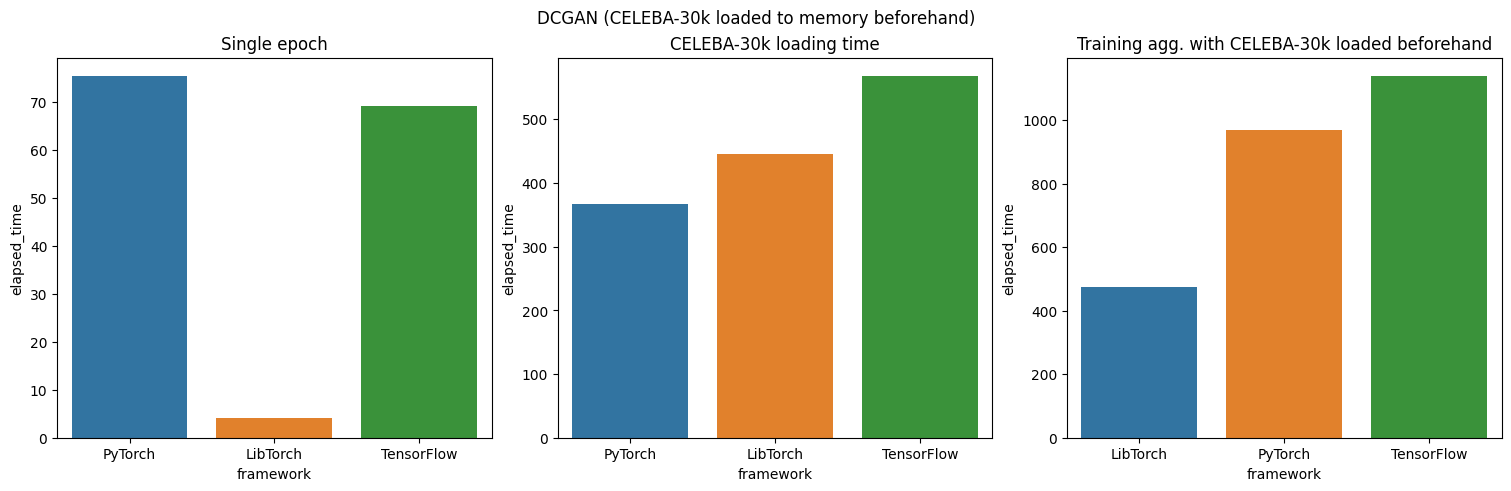

In [16]:
fig, axes = plt.subplots(1,3, constrained_layout=True)
fig.set_size_inches(15, 4.8)
fig.suptitle('DCGAN (CELEBA-30k loaded to memory beforehand)')

dcgan = training[training.model_name == 'DCGAN']
dcgan = dcgan[dcgan.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[0])
axes[0].set_title('Single epoch')

dcgan = evaluation[evaluation.model_name == 'CELEBA'].copy()
dcgan.elapsed_time /= 1e3 # ms to s
sns.barplot(data=dcgan, x='framework', y='elapsed_time', ax=axes[1])
axes[1].set_title('CELEBA-30k loading time')

dcgan = training[training.model_name == 'DCGAN'].groupby('framework')['elapsed_time'].sum()
celeba = evaluation[evaluation.model_name == 'CELEBA'].groupby('framework')['elapsed_time'].sum() / 1e3 # ms to s
agg = (dcgan + celeba).reset_index()
sns.barplot(data=agg, x='framework', y='elapsed_time', ax=axes[2])
axes[2].set_title('Training agg. with CELEBA-30k loaded beforehand')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_comp_celeba_from_memory.png')

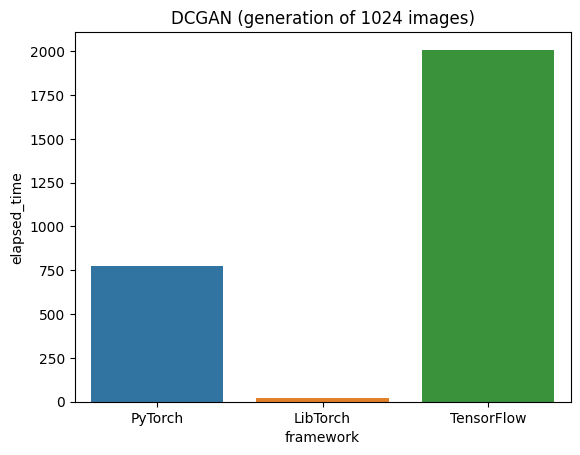

In [17]:
fig, ax = plt.subplots(1,1)

sodnet = evaluation[evaluation.model_name == 'DCGAN']
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('DCGAN (generation of 1024 images)')

if GENERATE_PNGS:
	fig.savefig('./plots/dcgan_gen_comp.png')

# SODNet - single object detection

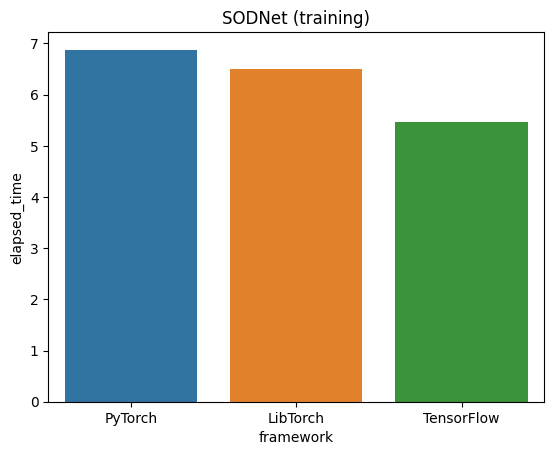

In [18]:
fig, ax = plt.subplots(1,1)

sodnet = training[training.model_name == 'SODNet']
sodnet = sodnet[sodnet.epoch == 5].drop(columns=['epoch'])
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('SODNet (training)')

if GENERATE_PNGS:
	fig.savefig('./plots/sodnet_comparison.png')

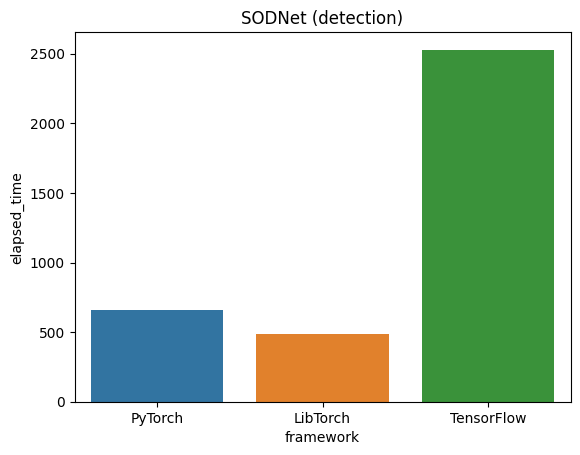

In [19]:
fig, ax = plt.subplots(1,1)

sodnet = evaluation[evaluation.model_name == 'SODNet']
sns.barplot(data=sodnet, x='framework', y='elapsed_time', ax=ax)
ax.set_title('SODNet (detection)')

if GENERATE_PNGS:
	fig.savefig('./plots/sodnet_detect_comp.png')